###  Importing important Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import sklearn as sk
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Importing your dataset
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Preprocessing

In [3]:
# Dropping the unneccessary columns 
data_1 = data.drop(['RowNumber','CustomerId','Surname'],axis = 1)

In [4]:
# Checking the null values of all columns
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
# count of null values
data_1.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Remove any white spacing in the column
data_1.columns = data_1.columns.str.strip()

In [7]:
# Getting column name of all dataset
data_1.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [8]:
# checking data satistics 
data_1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data_1.select_dtypes(include=['object']).columns

Index(['Geography', 'Gender'], dtype='object')

## Exploratory Data Analysis

<Figure size 1600x900 with 0 Axes>

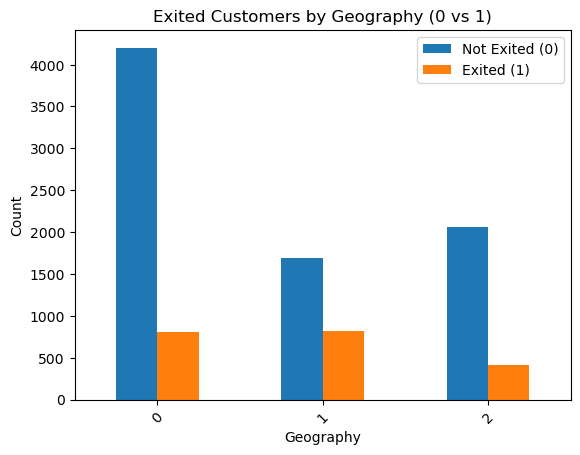

In [47]:
# List of Categorical variables to plot 
plt.figure(figsize = (16,9))
grouped_data = data_1.groupby(['Geography', 'Exited']).size().unstack()

# Create a bar plot
ax = grouped_data.plot.bar(stacked=False)
# Set labels and title
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Exited Customers by Geography (0 vs 1)')

# Set the legend
plt.legend(['Not Exited (0)', 'Exited (1)'])

# Rotate x-axis labels if needed
plt.xticks(rotation=45)
# Display the plot 
plt.show()

<Figure size 1600x900 with 0 Axes>

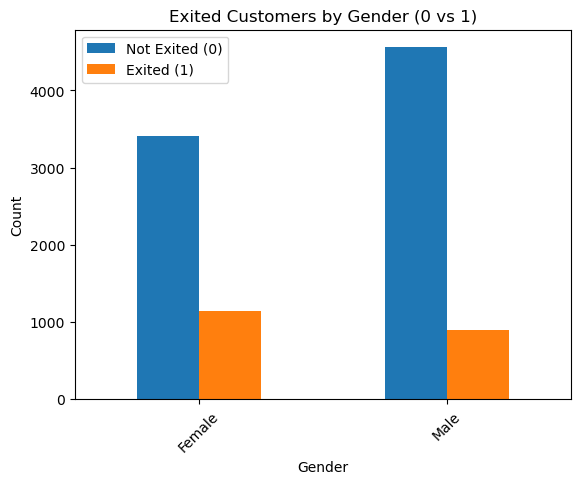

In [11]:
plt.figure(figsize = (16,9))
grouped_data = data_1.groupby(['Gender', 'Exited']).size().unstack()

# Create a bar plot
ax = grouped_data.plot.bar(stacked=False)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Exited Customers by Gender (0 vs 1)')

# Set the legend
plt.legend(['Not Exited (0)', 'Exited (1)'])

# Rotate x-axis labels if needed
plt.xticks(rotation=45)
# Display the plot
#plt.tight_layout()
plt.show()

<Figure size 1600x900 with 0 Axes>

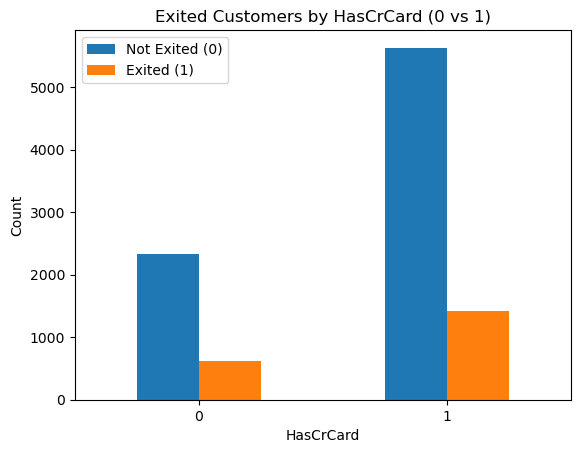

In [51]:
# List of Categorical variables to plot 
plt.figure(figsize = (16,9))
grouped_data = data_1.groupby(['HasCrCard', 'Exited']).size().unstack()

# Create a bar plot
ax = grouped_data.plot.bar(stacked=False)
# Set labels and title
plt.xlabel('HasCrCard')
plt.ylabel('Count')
plt.title('Exited Customers by HasCrCard (0 vs 1)')
# Rotate x-axis labels if needed
plt.xticks(rotation=360)
# Set the legend
plt.legend(['Not Exited (0)', 'Exited (1)'])

# Display the plot 
plt.show()

<Figure size 1600x900 with 0 Axes>

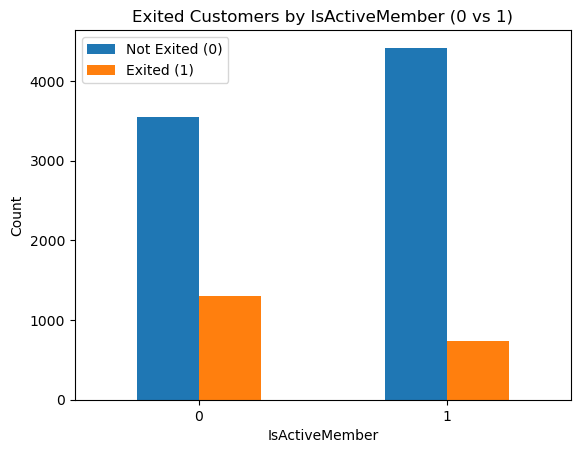

In [55]:
# List of Categorical variables to plot 
plt.figure(figsize = (16,9))
grouped_data = data_1.groupby(['IsActiveMember', 'Exited']).size().unstack()

# Create a bar plot
ax = grouped_data.plot.bar(stacked=False)
# Set labels and title
plt.xlabel('IsActiveMember')
plt.ylabel('Count')
plt.title('Exited Customers by IsActiveMember (0 vs 1)')
# Rotate x-axis labels if needed
plt.xticks(rotation=360)
# Set the legend
plt.legend(['Not Exited (0)', 'Exited (1)'])

# Display the plot 
plt.show()

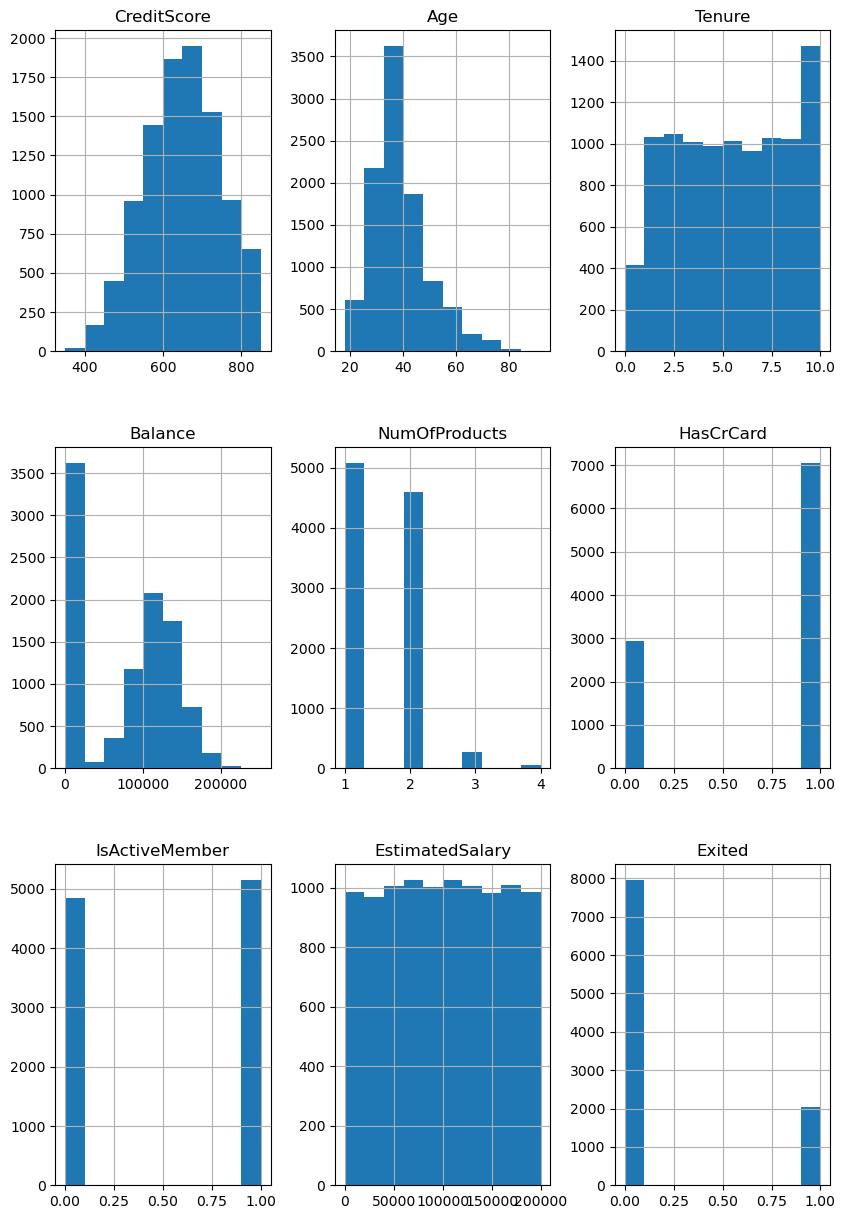

In [14]:
# Get the hist plot of all variable to see their distribution
data_1.hist(figsize = (10,15)) # here we checking normality 
plt.show()

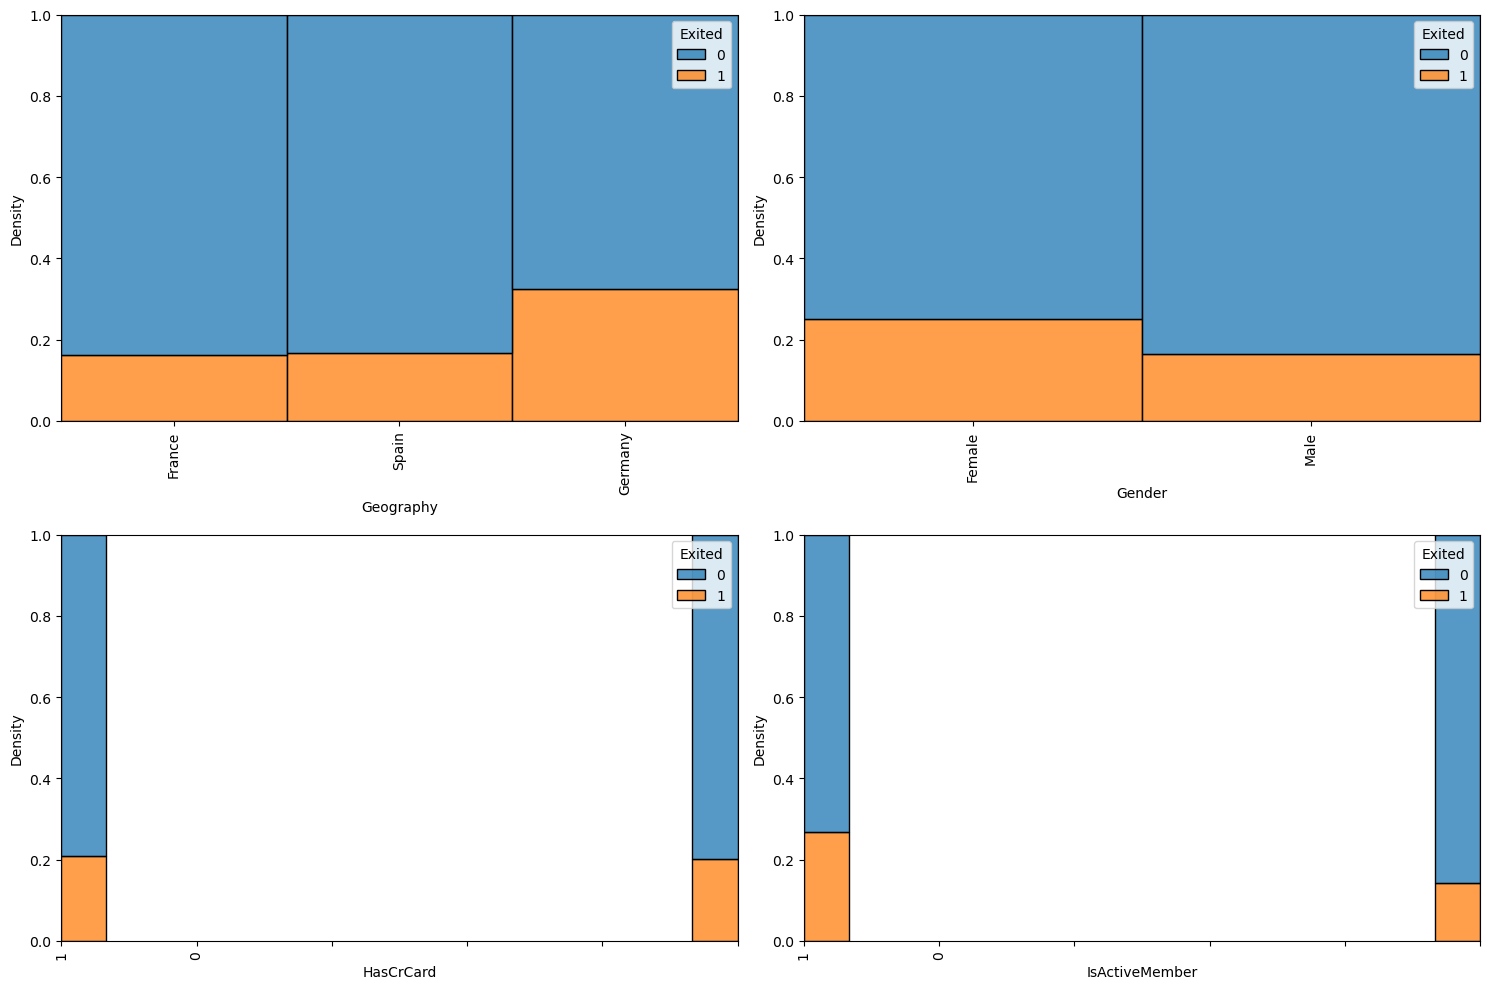

In [15]:
# get list of categorical variables
cat_vars = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Exited', data=data_1, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(data_1[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

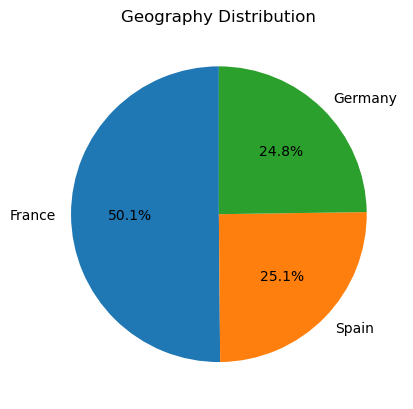

In [16]:
# Geographical distribution of different countries 
plt.pie(data_1['Geography'].value_counts(normalize = True), labels=data_1['Geography'].unique(), autopct='%1.1f%%', startangle=90)
# Title of the plot
plt.title('Geography Distribution')
# Call tight_layout to adjust the positions
fig.tight_layout()
# Display the figure
plt.show()

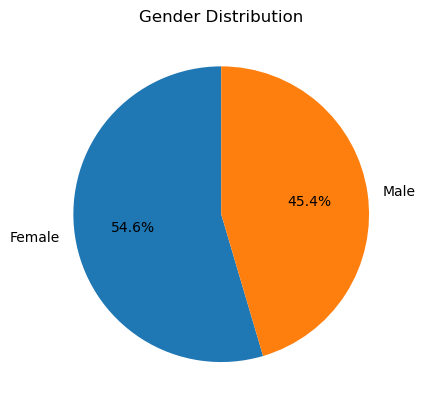

In [17]:
#Gender Distribution
plt.pie(data_1['Gender'].value_counts(normalize = True), labels=data_1['Gender'].unique(), autopct='%1.1f%%', startangle=90)
# Title of the plot
plt.title('Gender Distribution')
# Call tight_layout to adjust the positions
fig.tight_layout()
# Display the figure
plt.show()

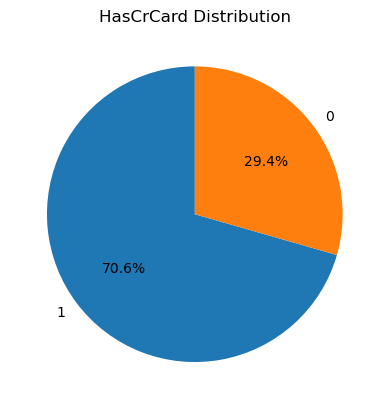

In [18]:
# Percentage if people that has card 
plt.pie(data_1['HasCrCard'].value_counts(normalize = True), labels=data_1['HasCrCard'].unique(), autopct='%1.1f%%', startangle=90)
plt.title('HasCrCard Distribution')
fig.tight_layout()
plt.show()

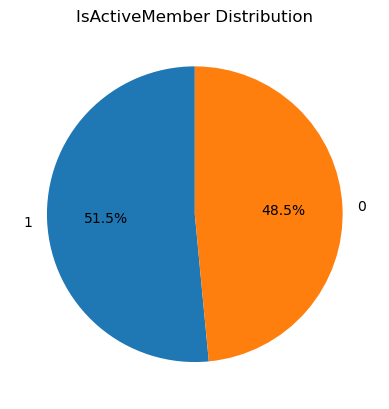

In [19]:
plt.pie(data_1['IsActiveMember'].value_counts(normalize = True), labels=data_1['IsActiveMember'].unique(), autopct='%1.1f%%', startangle=90)
plt.title('IsActiveMember Distribution')
fig.tight_layout()
plt.show()

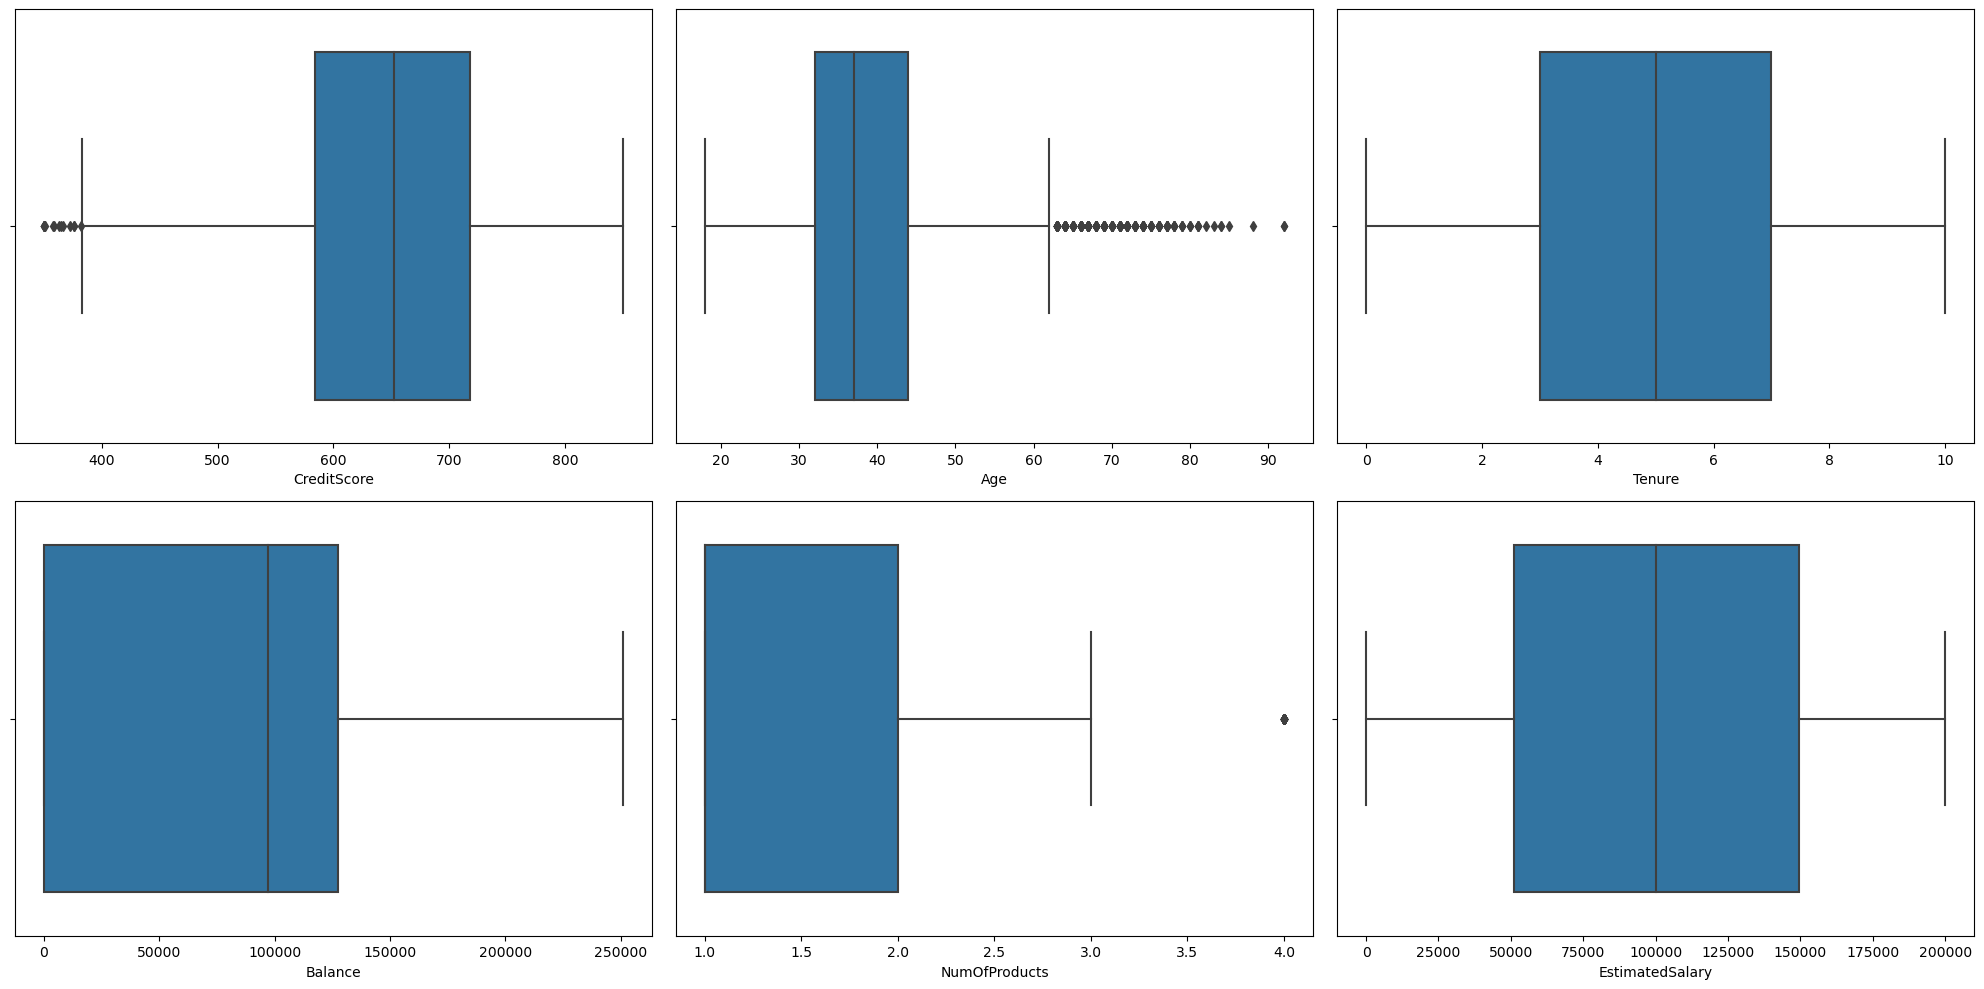

In [21]:
# plotting of numerical variable to see their distribution and know about the outliers
# Defining the numerical variables
num_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 
            'NumOfProducts','EstimatedSalary']
# Defining the number of plot in the given layout
fig,axs = plt.subplots(nrows=2,ncols = 3,figsize=(20,10))
# Flatten the axs array
axs = axs.flatten()
# iterating over the numerical variables
for i ,var in enumerate(num_vars):
    # PLotting the box plot of numerical variables
    sns.boxplot(x = var,data = data_1,ax =axs[i])
# Call tight_layout to adjust the positions    
fig.tight_layout()
# Display the plot
plt.show()

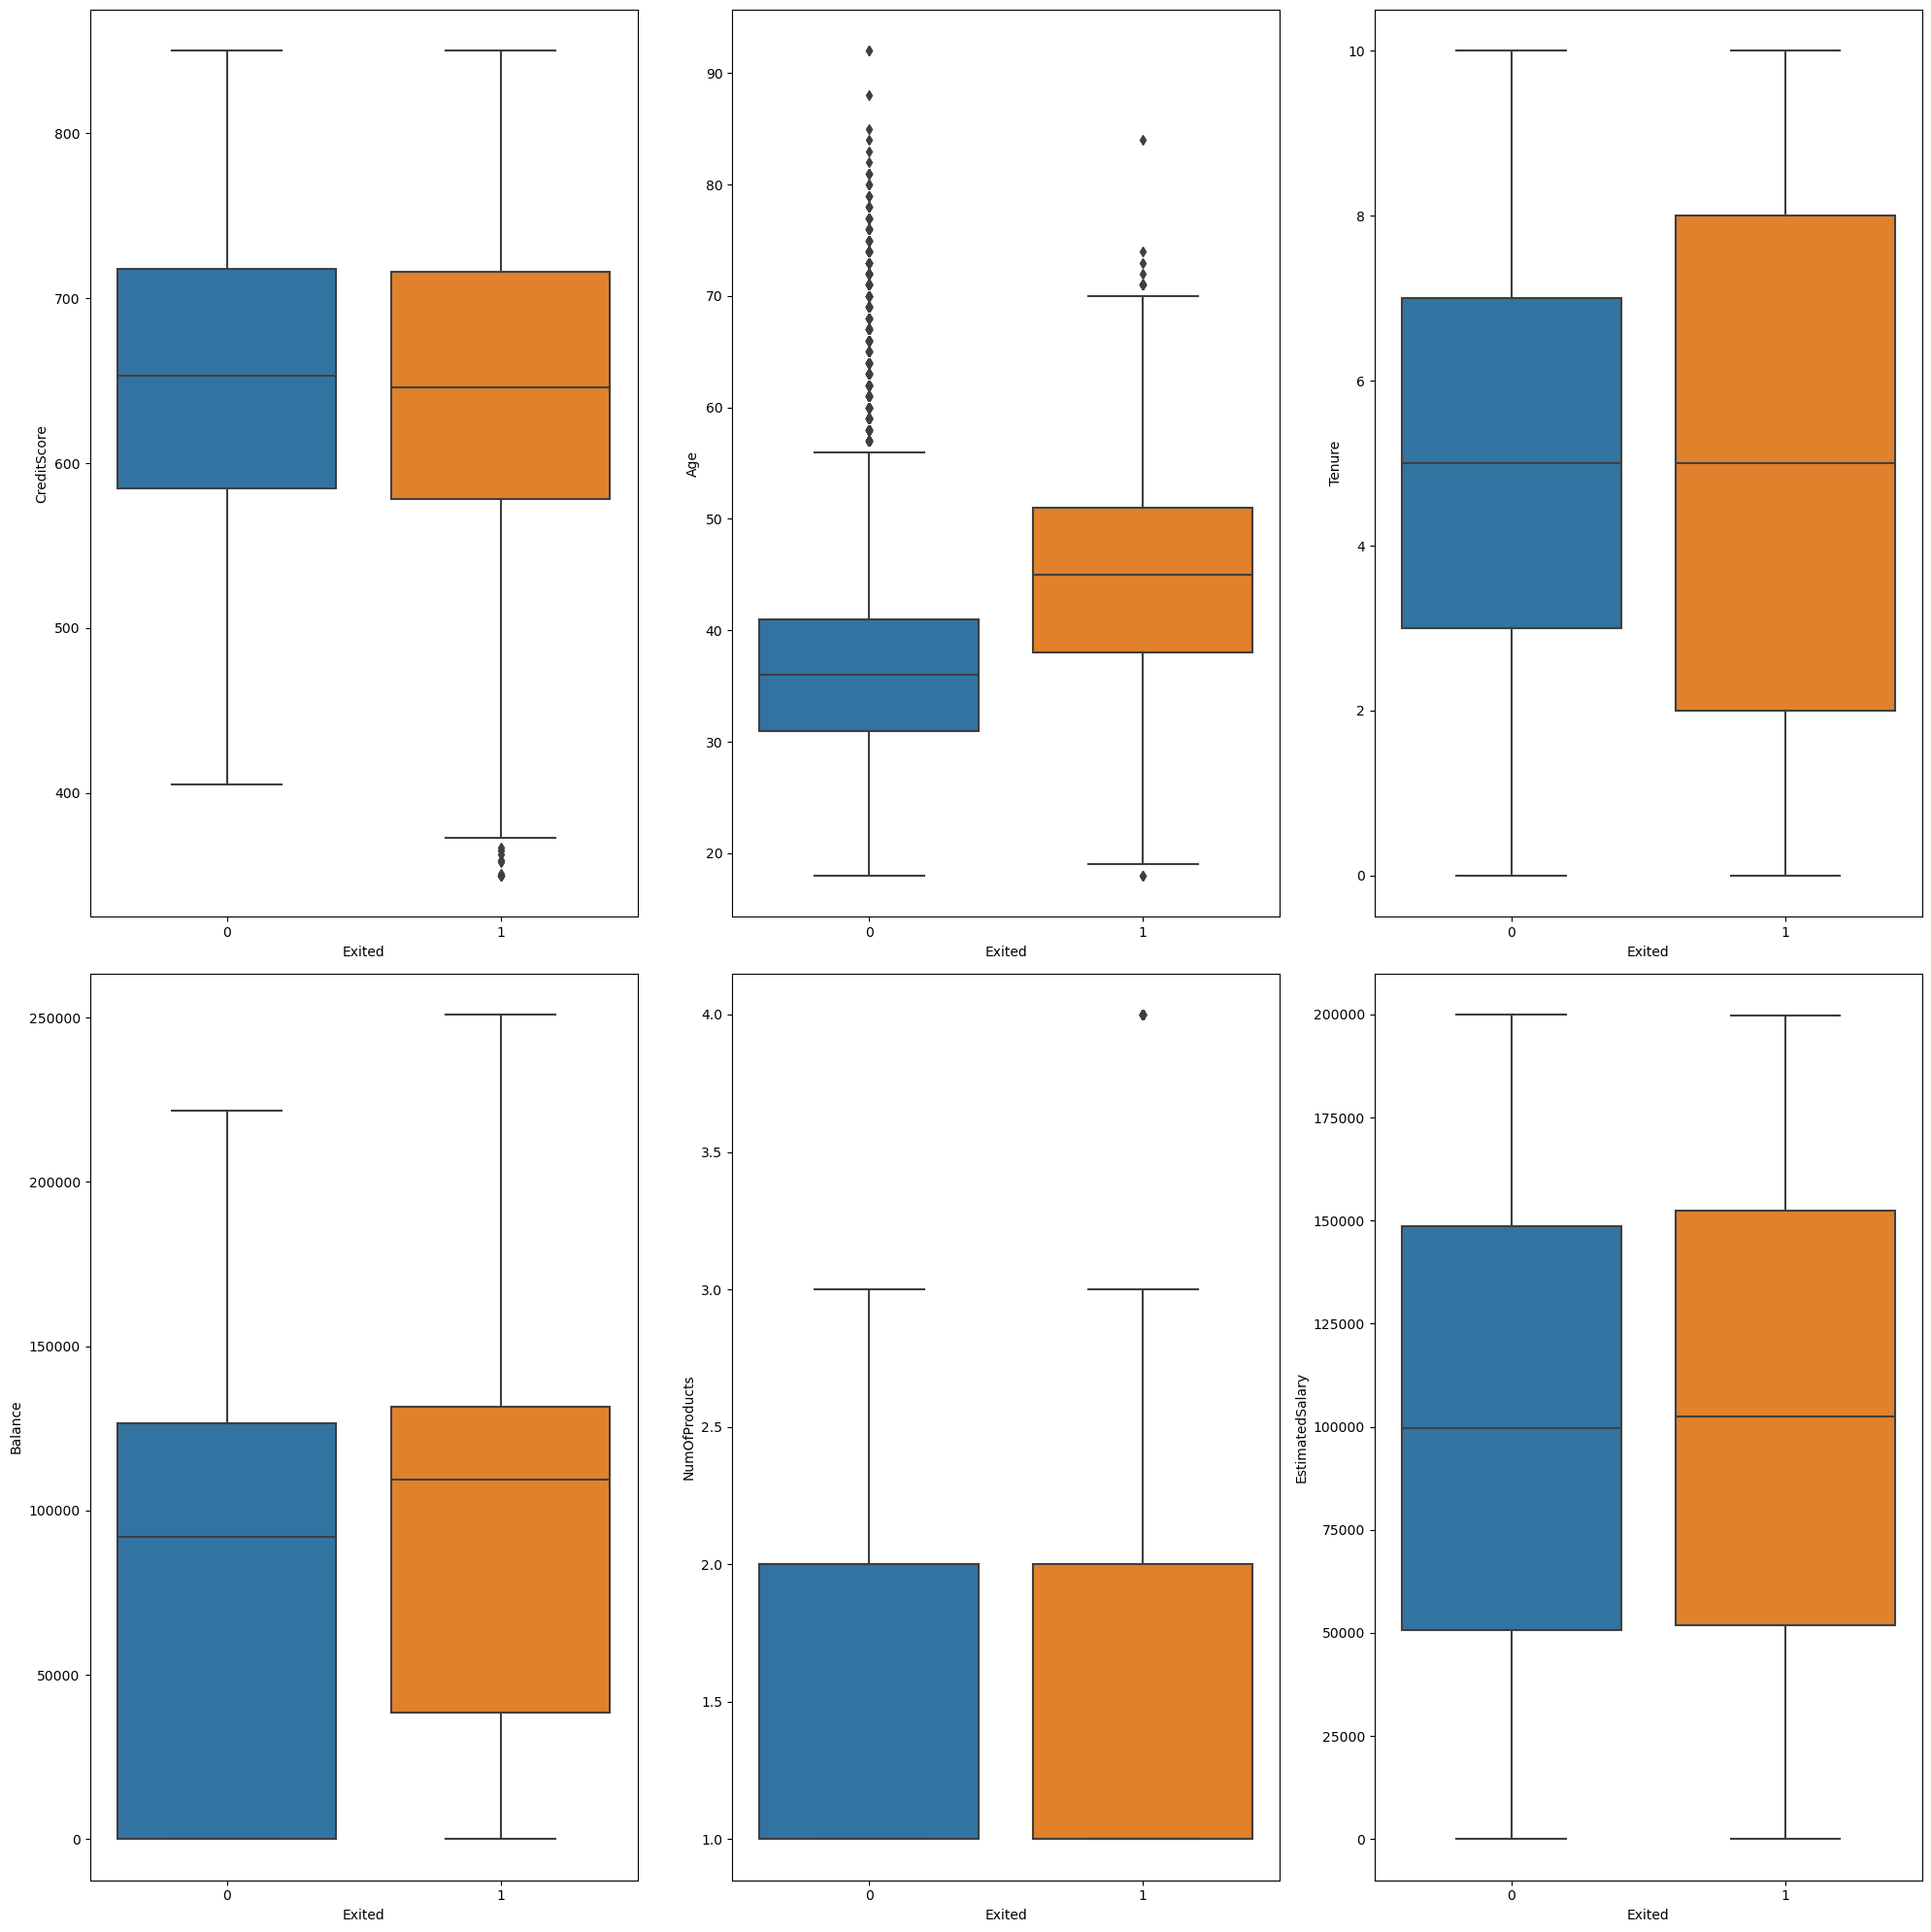

In [22]:
# plotting of numerical variable to see their distribution with exited column and know about the outliers
# Defining the numerical variables
num_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 
            'NumOfProducts','EstimatedSalary']
# Create a 2x3 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
# Flatten the axs array
axs = axs.flatten()
# Iteration over the subplots using a single loop
for i, var in enumerate(num_vars):
    # Perform same operation on each subplot
    sns.boxplot(y=var, x='Exited', data=data_1, ax=axs[i])
# Call tight_layout to adjust the positions
fig.tight_layout()
# Display the plot
plt.show()

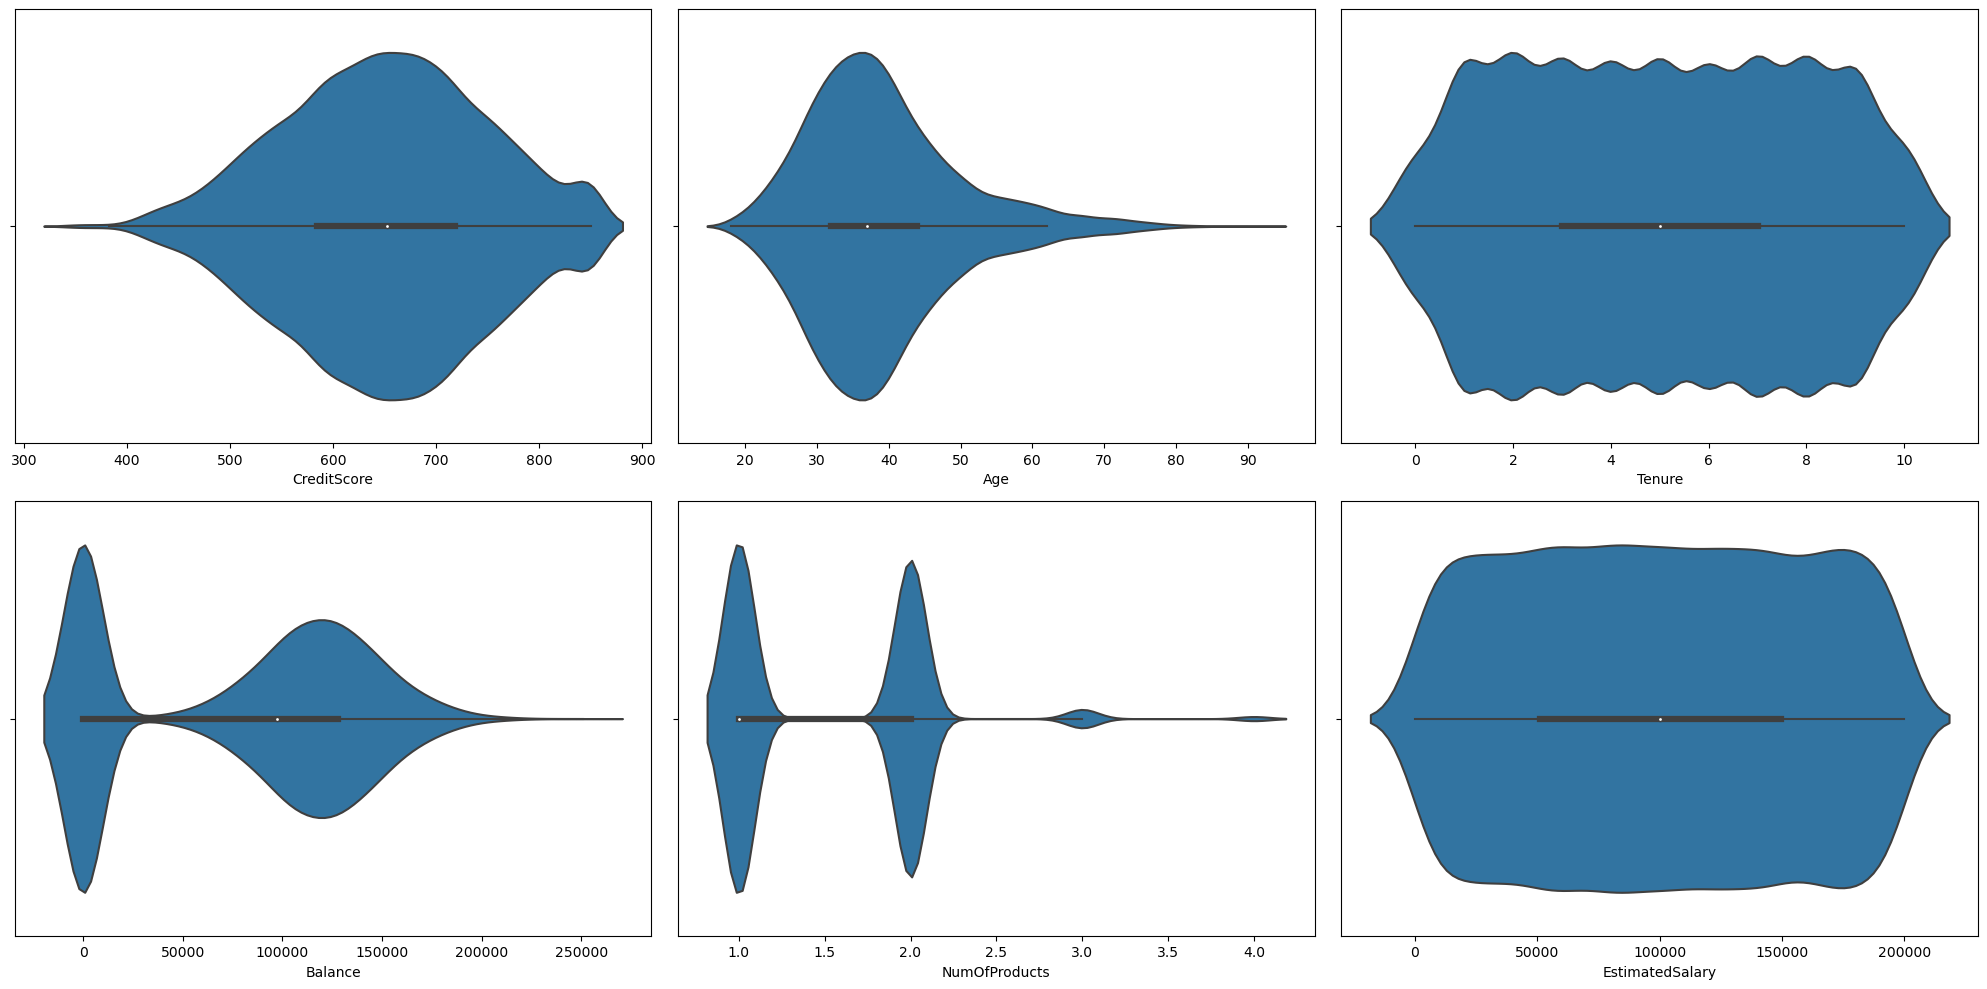

In [23]:
# plotting of numerical variable to see their distribution with violineplot
# Defining the numerical variables
num_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 
            'NumOfProducts','EstimatedSalary']
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
# Flatten the axs array
axs = axs.flatten()
# Iteration over the subplots using a single loop
for i, var in enumerate(num_vars):
     # Perform same operation on each subplot
    sns.violinplot(x=var, data=data_1, ax=axs[i])
fig.tight_layout()
plt.show()

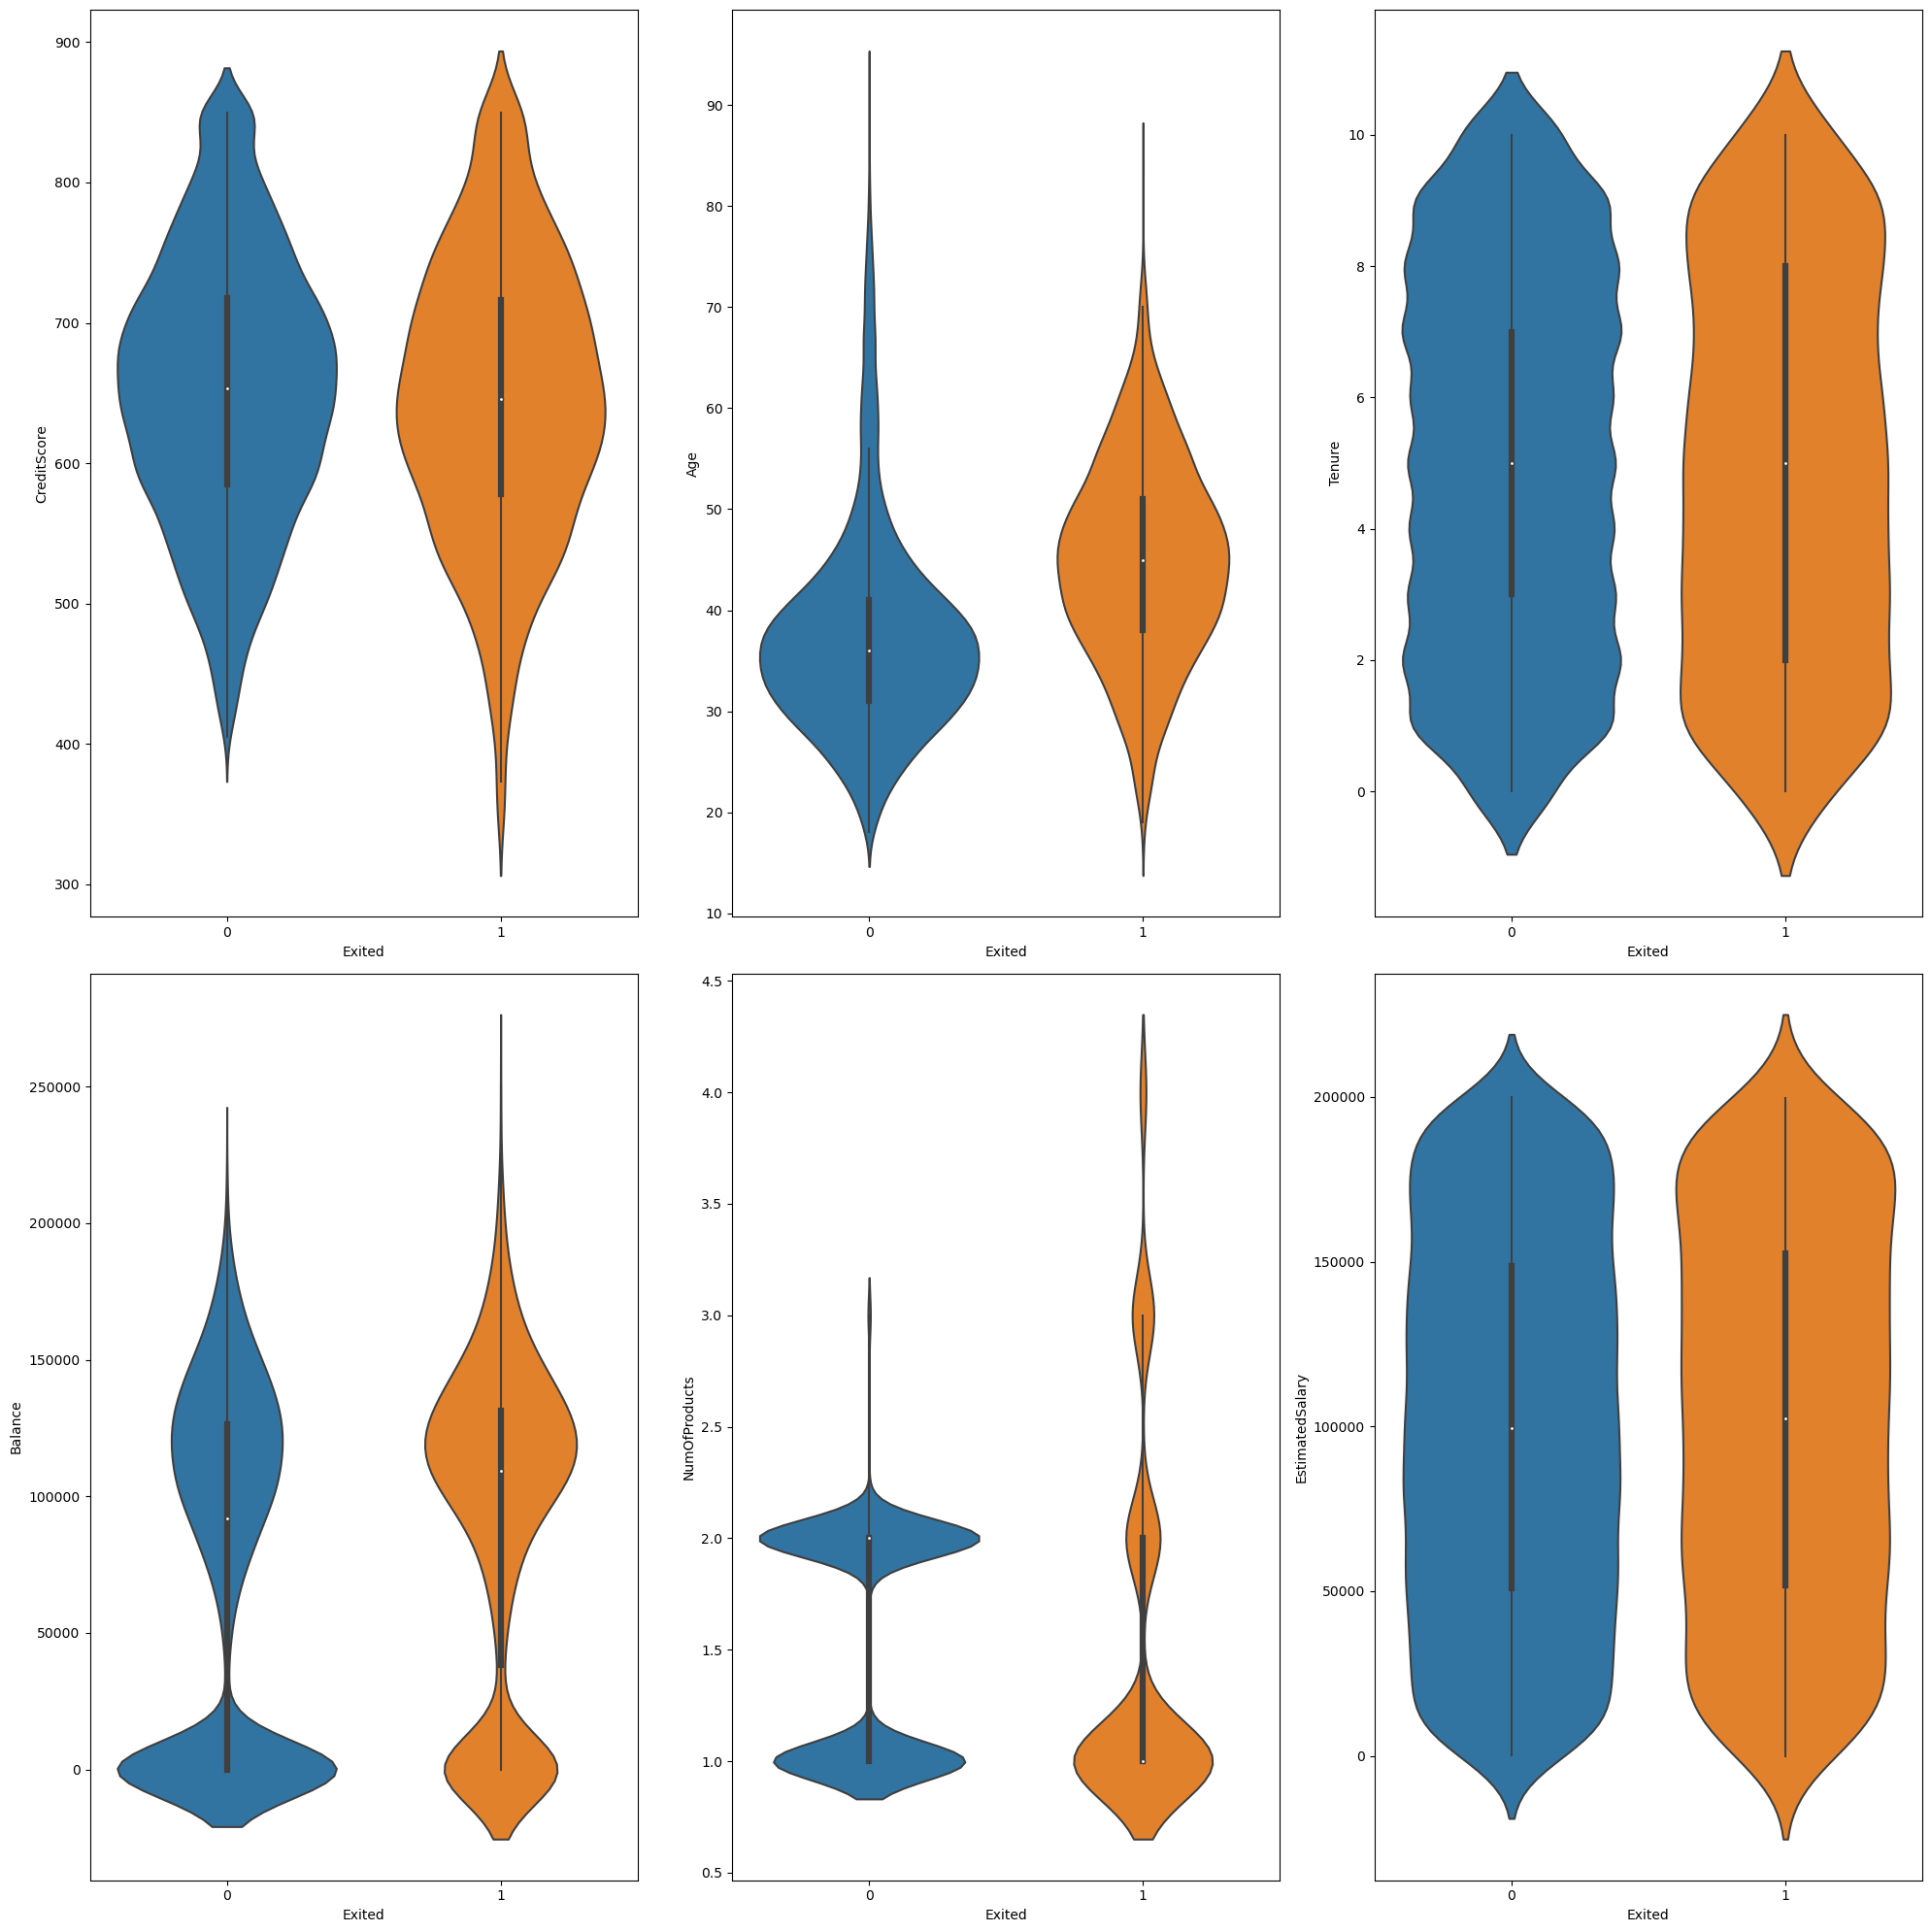

In [24]:
num_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 
            'NumOfProducts','EstimatedSalary']
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
# Flatten the axs array
axs = axs.flatten()
# Iteration over the subplots using a single loo
for i, var in enumerate(num_vars):
    sns.violinplot(y=var, data=data_1, x='Exited', ax=axs[i])
fig.tight_layout()
plt.show()

<Axes: >

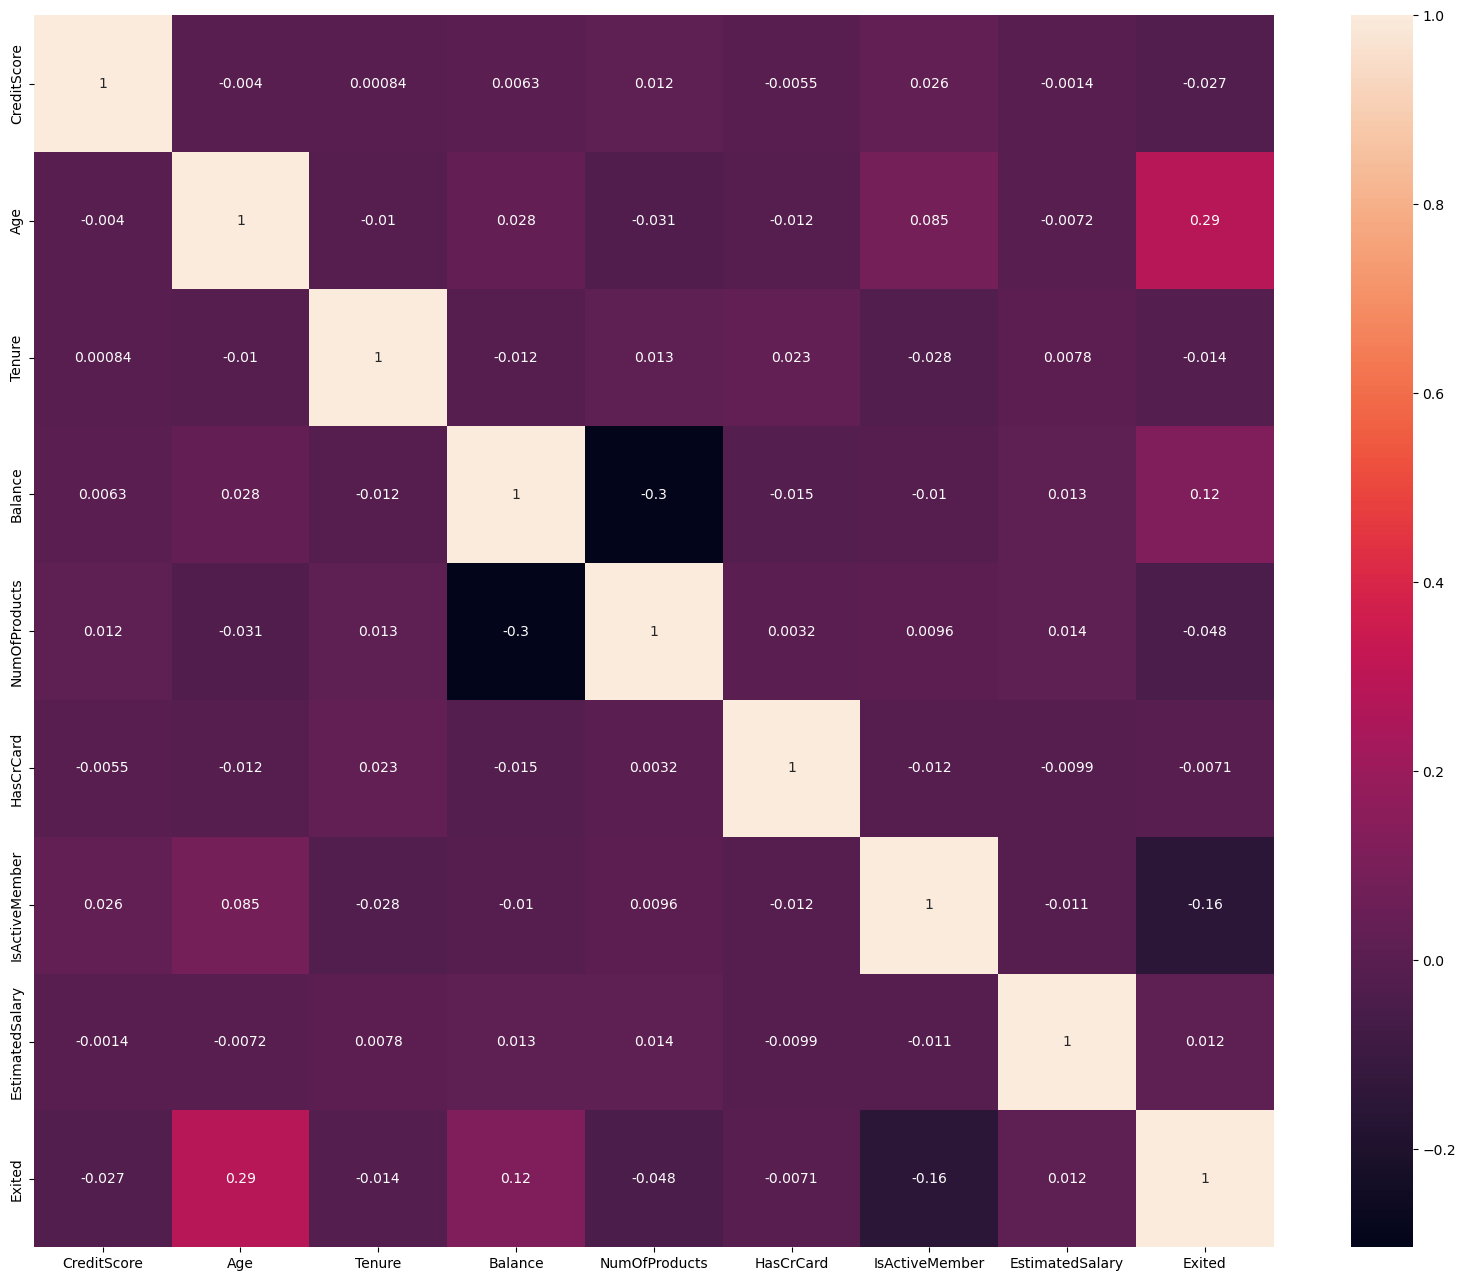

In [25]:
#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(20, 16))
sns.heatmap(data_1.corr(), fmt='.2g', annot=True)

In [26]:
from sklearn import preprocessing
# loop over each column in the DataFrame where dtype is 'object'
for col in data_1.select_dtypes(include=['object']).columns:
    # Initization of label encoder object 
    label_encoder = preprocessing.LabelEncoder()
    # Fit the encoder to the unique values in the column
    label_encoder.fit(data_1[col].unique())
    # Transform the column using the encoder
    data_1[col] = label_encoder.transform(data_1[col])
    # print the column name and the unique encoded values
    print(f"{col}:{data_1[col].unique()}")

Geography:[0 2 1]
Gender:[0 1]


## Train Test Split

In [27]:
 from sklearn.model_selection import train_test_split
# Select the features (X) and the targets variables(y)
    x = data_1.drop('Exited',axis = 1)
    y = data_1['Exited']
    
 # Split the data into training and testing dataset (order matter)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
x_train.shape, y_train.shape,x_test.shape,y_test.shape

((8000, 10), (8000,), (2000, 10), (2000,))

## Remove the outliers from train data using the Z-Score

In [29]:
data_1.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [30]:
from scipy import stats
# Define the column that you want to remove the oulliers
selected_columns = ['Age','NumOfProducts','CreditScore']
# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(x_train[selected_columns]))
# set a threshold value for outliers detections(e.g 3)
threshold = 3
# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model_1  = DecisionTreeClassifier(class_weight = 'balanced')
# This step is used for hyperparameter tuining and  optimize the complexity of the model 
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}


In [32]:
# Perform a grid search with cross valdiation to find best hyperparameter
grid_search = GridSearchCV(model_1,param_grid,cv = 5)
grid_search.fit(x_train,y_train)
#print the best hyperparameter
print(grid_search.best_params_)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [33]:
# Provide model with these hyperparameter
model_1 = DecisionTreeClassifier(random_state=0,max_depth=3,min_samples_leaf=1,min_samples_split=2,class_weight = 'balanced')
model_1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=0)

In [34]:
# R-square value of the model
model_1.score(x_train,y_train)

0.7448654165072075

In [35]:
# Accuracy score of the model
from sklearn.metrics import accuracy_score
y_pred = model_1.predict(x_test)
print('Accuracy Score:',round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score: 74.3 %


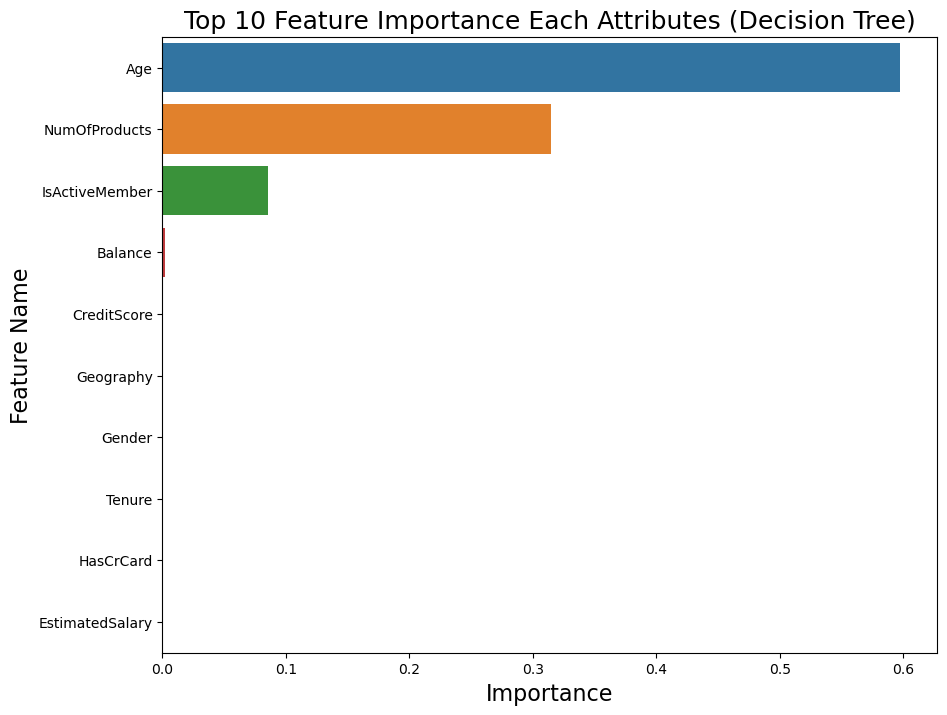

In [36]:
# Selecting important features  from the decision tree model
imp_df = pd.DataFrame({'Feature Name': x_train.columns,'Importance': model_1.feature_importances_})
fi = imp_df.sort_values(by = 'Importance', ascending = False)
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [37]:
# A look into confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.743')

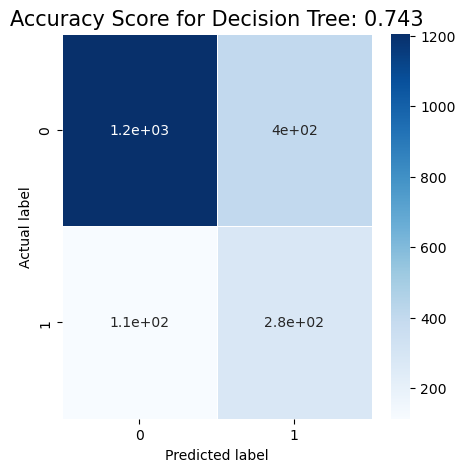

In [39]:
# Plotting heat maps for confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(model_1.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight = 'balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}


In [41]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, class_weight='balanced')
model_2.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

In [42]:
model_2.score(x_train,y_train)

0.9998724327082537

In [43]:
model_2.score(x_test,y_test)

0.8615

In [44]:
y_pred = model_2.predict(x_test)

In [45]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

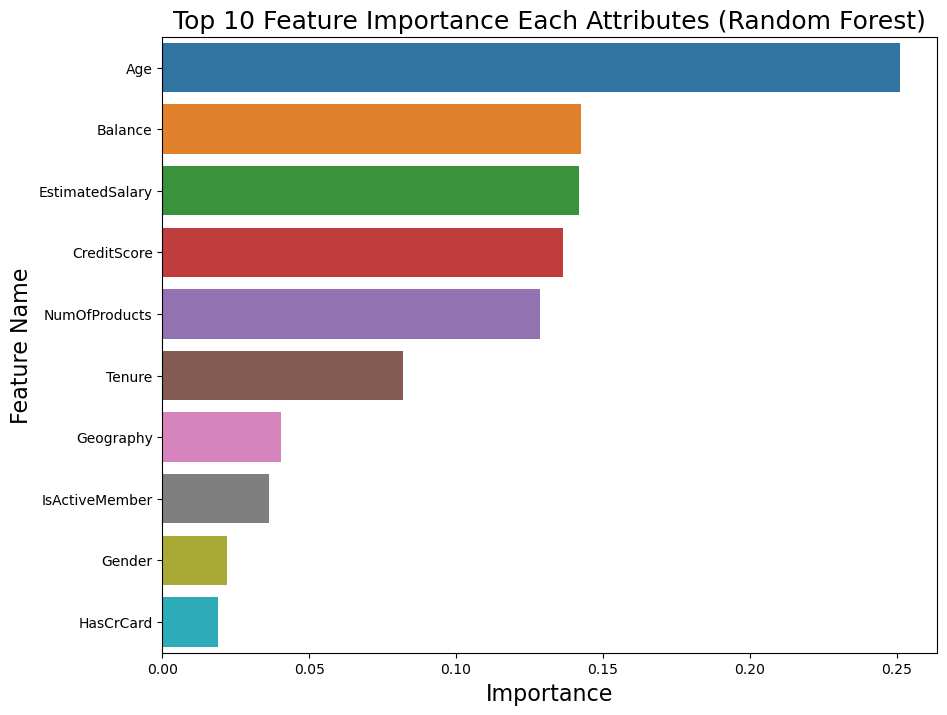

In [46]:
imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": model_2.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()  